In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread('./test_images/maria-sharapova.jpg')
img.shape

(1024, 768, 3)

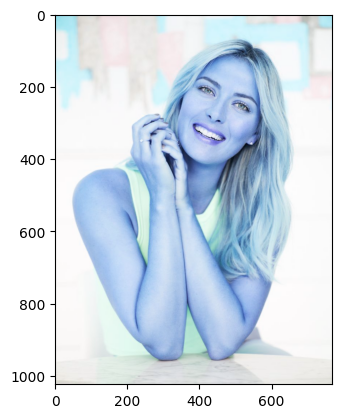

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1024, 768)

In [5]:
gray

array([[210, 211, 212, ..., 225, 225, 225],
       [210, 211, 212, ..., 225, 225, 225],
       [211, 212, 213, ..., 226, 225, 225],
       ...,
       [213, 213, 213, ..., 221, 221, 221],
       [217, 217, 217, ..., 223, 223, 223],
       [223, 223, 223, ..., 225, 224, 224]], dtype=uint8)

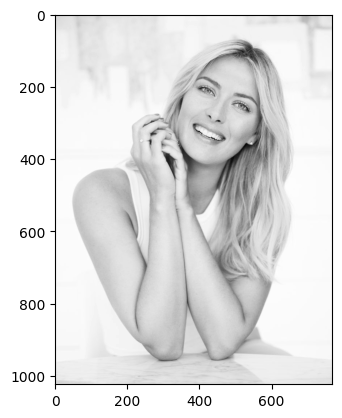

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray,1.3,3)
faces

array([[334, 148, 255, 255]])

In [8]:
(x,y,w,h)=faces[0]

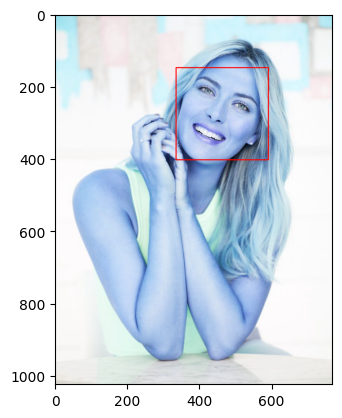

In [9]:
face_img=cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

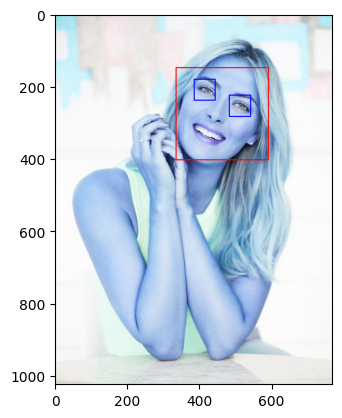

In [10]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray,1.1,10)
    for (ex,ey,ew,eh) in eyes:
        if ey < h/2:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

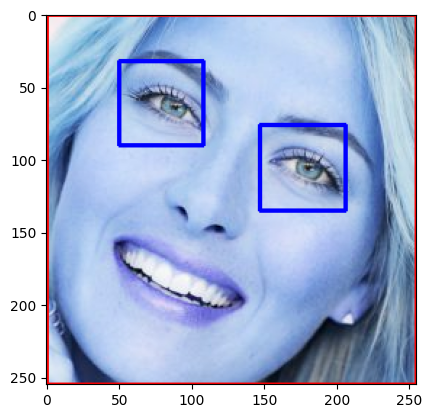

In [11]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    if img is None:
        print(f"Image not loaded: {image_path}")
        return None
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,3)
    for(x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray,1.1,10)
        if len(eyes)>=2:
            return roi_color

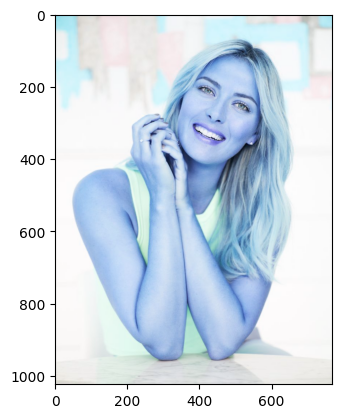

In [13]:
original_image=cv2.imread('./test_images/maria-sharapova.jpg')
plt.imshow(original_image)

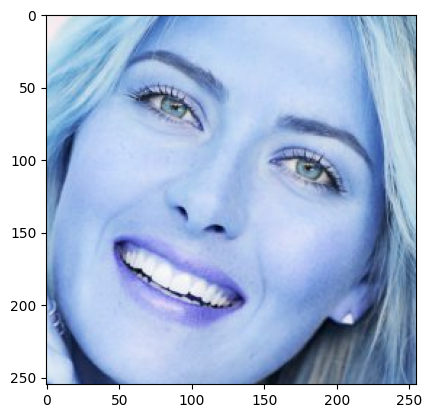

In [14]:
cropped_image=get_cropped_image_if_2_eyes('./test_images/maria-sharapova.jpg')
plt.imshow(cropped_image)

In [15]:
img2=get_cropped_image_if_2_eyes('./dataset/maria_sharapova/250px-Maria_Sharapova_-_Roland-Garros_2013_-_002.jpg')
img2

In [16]:
path_to_data="./dataset/"
path_to_cr_data="./dataset/cropped/"

In [17]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
    

In [18]:
img_dirs

['./dataset/cristiano_ronaldo',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/mary_kom',
 './dataset/pv_sindhu',
 './dataset/Sania_Mirza',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)

os.mkdir(path_to_cr_data)

In [20]:
cropped_img_dirs=[]
celebrity_file_names_dict={}

for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color= get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped images in folder:",cropped_folder)

            cropped_file_name= celebrity_name + str(count) +".png"
            cropped_file_path=cropped_folder + "/"+ cropped_file_name

            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

cristiano_ronaldo
Generating cropped images in folder: ./dataset/cropped/cristiano_ronaldo
lionel_messi
Generating cropped images in folder: ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder: ./dataset/cropped/maria_sharapova
mary_kom
Generating cropped images in folder: ./dataset/cropped/mary_kom
pv_sindhu
Generating cropped images in folder: ./dataset/cropped/pv_sindhu
Sania_Mirza
Generating cropped images in folder: ./dataset/cropped/Sania_Mirza
serena_williams
Generating cropped images in folder: ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder: ./dataset/cropped/virat_kohli


In [22]:
import numpy as np
import pywt 
import cv2

In [23]:
celebrity_file_names_dict={}
for img_dir in cropped_img_dirs:
    celebrity_name=img_dir.split('/')[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)

    celebrity_file_names_dict[celebrity_name]=file_list

celebrity_file_names_dict
    

{'cristiano_ronaldo': ['./dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo1.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo10.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo11.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo12.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo13.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo14.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo15.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo16.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo17.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo18.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo19.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo2.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo20.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo21.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo

In [24]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

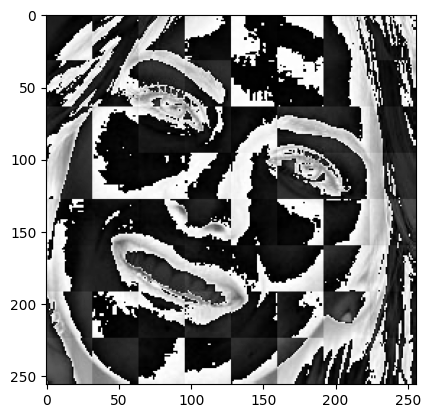

In [25]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [26]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1

class_dict

{'cristiano_ronaldo': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'mary_kom': 3,
 'pv_sindhu': 4,
 'Sania_Mirza': 5,
 'serena_williams': 6,
 'virat_kohli': 7}

In [27]:
X,y=[],[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_img in training_files:
        img=cv2.imread(training_img)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [28]:
len(X[0])

4096

In [29]:
X=np.array(X).reshape(len(X),4096).astype(float)

In [30]:
X.shape

(502, 4096)

In [31]:
X[0]

array([ 38.,  34.,  29., ..., 235., 217., 202.])

In [32]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])

pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.7380952380952381

In [34]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.95      0.81        20
           1       1.00      0.50      0.67        10
           2       0.83      0.36      0.50        14
           3       0.80      0.84      0.82        19
           4       0.67      0.80      0.73        15
           5       0.66      0.96      0.78        26
           6       1.00      0.09      0.17        11
           7       0.91      0.91      0.91        11

    accuracy                           0.74       126
   macro avg       0.82      0.68      0.67       126
weighted avg       0.79      0.74      0.70       126



In [55]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [56]:
model_params = {
    'svm': {
        'model': SVC(probability=True),
        'params': {
            'svc__C': [0.1, 1, 10, 100],
            'svc__kernel': ['rbf', 'linear'],
            'svc__gamma': ['scale', 'auto']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [10, 50, 100],
            'randomforestclassifier__max_depth': [None, 5, 10],
            'randomforestclassifier__min_samples_split': [2, 5]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', max_iter=1000),
        'params': {
            'logisticregression__C': [0.1, 1, 5, 10]
        }
    }
}

In [57]:
scores = []
best_estimators = {}
import pandas as pd
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    
    clf =  GridSearchCV(pipe, mp['params'], cv=cv, return_train_score=False,n_jobs=-1)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.760737,"{'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__k..."
1,random_forest,0.680877,"{'randomforestclassifier__max_depth': 10, 'ran..."
2,logistic_regression,0.787298,{'logisticregression__C': 0.1}


In [58]:
best_estimators['svm'].score(X_test,y_test)

0.8174603174603174

In [59]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7857142857142857

In [60]:
best_clf=best_estimators['svm']

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[19,  0,  0,  0,  1,  0,  0,  0],
       [ 2,  7,  0,  0,  0,  0,  0,  1],
       [ 1,  0,  8,  1,  1,  2,  1,  0],
       [ 0,  1,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0],
       [ 1,  0,  2,  0,  3, 20,  0,  0],
       [ 1,  0,  1,  1,  1,  2,  5,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 11]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

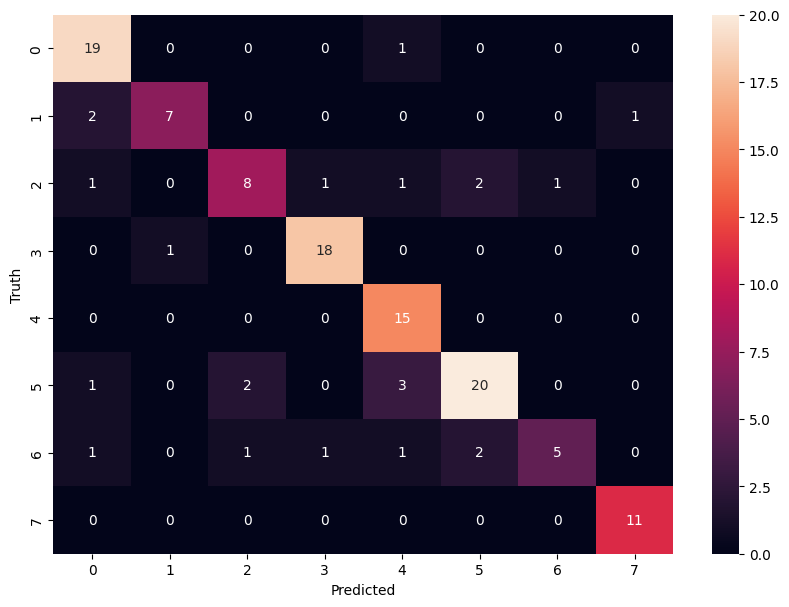

In [42]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
class_dict

{'cristiano_ronaldo': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'mary_kom': 3,
 'pv_sindhu': 4,
 'Sania_Mirza': 5,
 'serena_williams': 6,
 'virat_kohli': 7}

In [44]:
!pip install joblib
import joblib
#save model as pkl file
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [45]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))